## WE WILL WORK WITH THE FASHION -MNIST DATASET & WILL FOLLOW THE FOLLOWING PROCESS;
#### 1. PREPARE DATA
#### 2. BUILD MODEL
#### 3. TRAIN MODEL
#### 4. ANALYZE THE MODEL'S RESULTS

<br>
<br>
<br>



## **1. PREPARE DATA**
#### We will use the ETL process to prepare data
#### EXTRACT, TRANSFORM, LOAD - ETL process
#### Extract the data from the source, transform it into its desirable form, load the data into a suitable structure for querrying and analysis 

In [5]:
import torch   ## Top-level pytorch package in the tensor library
import torchvision  ## Package that provides access to popular datasets, model architectures and image trasformations for computer vision
import torchvision.transforms as transforms ## An interface that gives us acess to common tranformations for our image processing
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_grad_enabled(True) #Sets one Pytorchs gradient calculation feature for training
torch.set_printoptions(linewidth=120) ## Sets the linewidth for pytorch output that is printed to the console

#### EXTRACT (Get data from its source)

In [6]:
## Let's create our fashionMNIST dataset instance

    ##==================================================================================================
    ##EXTRACT 
    ##==================================================================================================
train_set = torchvision.datasets.FashionMNIST(
    root =  "./data/FashinMNIST", ## This tells it where to load the data from if its there
    train = True, ## This tells we want the training set
    download = True, ## This tells the class to download the data if its not present in the location we specified.
    ##==================================================================================================
    ##TRANSFORM   (Convert the data into tensor form)
    ##==================================================================================================
    transform = transforms.Compose([transforms.ToTensor()])) ## Here we pass a composition of transformations that should be performed on the datasets
                                                             ## We use ToTensor() transformation since we want our images to be transformed to tensors

#### LOAD (Put the data into an object to make it easily accessible)

In [7]:
 ##==================================================================================================
 ##LOAD 
 ##==================================================================================================
train_loader = torch.utils.data.DataLoader(train_set) ##This wraps the dataset up inside the dataloader object instance
                                                      ## DataLoader gives us querrying capabilities
                                                      ## Now we can leverage the laoder for tasks that would be otherwise very complicated to implement by hand
                                                      ##E.g batchsize, thread management and shuffle capabilities

### PyTorch Datasets and DataLoaders - Training Set Exploration for Deep Learning

In [8]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 10) ##Here we specify the batch_size so we can look at many images
                                                                       ## If we don't, we only get one image as it is the default
                                                                       ## So in the ETL process above, we would only get one image                                            

In [9]:
len(train_set) ## This returns the number of images in the training set, which we already know is 60,000 from Fashion-MNST

60000

In [10]:
train_set.targets ##This gives us the target tensor of the dataset
                  ##This would have been train_set.train_labels but was changed, now we use targets
                  ##Encodes the actual class names or labels, 9 = ankleboot, 0 = T-shirt etc.

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_set.classes ## We can check all the classes in our training set

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Check if our data is balanced

In [12]:
train_set.targets.bincount()##Here we create bins and count the frequency of occurances within each bin
                            ##Calling this on the targets tensor gives the freq distrib of the values in the tensor
                            ## The Fashion-MNST dataset is uniform with respect to the number of samples from each class (balanced)
                            ## If the classes had varrying number of samples, the dataset would be unbalanced

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### We can make the train_set iterable and iterate over it

In [13]:
sample = next(iter(train_set))## This returns a single sample
len(sample) ##The sample contains two items (image, label) each as a tensor

2

In [14]:
type(sample) ## We can see that each element in the train_set is a tuple

tuple

In [15]:
# image = sample[0]
# label = sample[1]
image, label = sample ## We can use squence unpacking to assign the image and the label

###### Checking the shapes of the image and label and then plotting the image

In [16]:
image.shape ##This is a grayscale image with a height and width of 28

torch.Size([1, 28, 28])

In [17]:
type(label)## The label is given to us as an int so it does not have a shape

int

## Display the image

Text(0.5, 1.0, 'Label: 9')

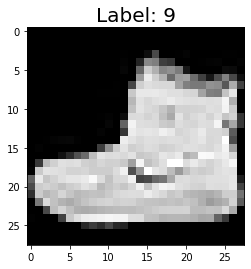

In [18]:
plt.imshow(image.squeeze(), cmap='gray') ##Here we squeeze off the color channel dimension and also specify the colormap to gray
plt.title("Label: " + str(label), fontsize =20)

## Working with batches and dataLoader

In [19]:
batch = next(iter(train_loader))##Iteraring over the batch
type(batch)##Checking the type if the bacth

list

In [20]:
len(batch) ##Checking the batch

2

In [21]:
images, labels = batch ## upacking the images and labels into the variables

In [22]:
images.shape #This shape is 10, 1, 28, 28 because there are 10 grayscale(1) images of height 28 and width 28 each

torch.Size([10, 1, 28, 28])

In [23]:
labels.shape #This is a tensor containing labels to the ten images in the batch

torch.Size([10])

In [24]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [25]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Labels:    [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]')

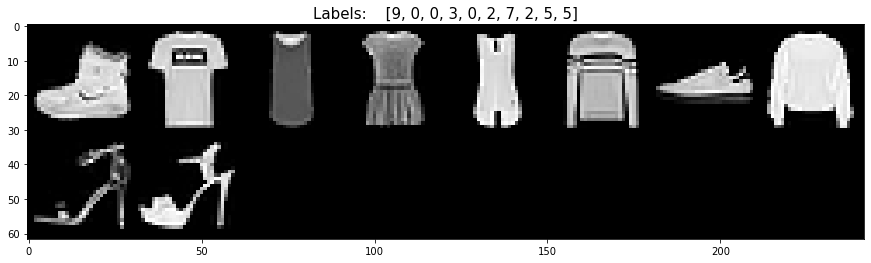

In [26]:
##Plotting all the images using the torchvision utility function

grid = torchvision.utils.make_grid(images, nrows = 10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
plt.title("Labels:    " + str(labels.tolist()), fontsize = 15)

## **2. BUILD THE MODEL**<br><br>

## BUILDING THE NUERAL NETWORK

In [27]:
import torch.nn  as nn 
import torch
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1   = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
   
    self.conv2  = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1     = nn.Linear(in_features=12*4*4, out_features=120) #out_features/feature maps
    self.fc2     = nn.Linear(in_features=120, out_features=60)
    self.out     = nn.Linear(in_features=60, out_features=10) # out_features in the last layer is 10 because we have 10 classes

  def forward(self, t):
 ##Implement the fwd method
    return t

my_network = Network()

print(my_network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


## FORWARD METHOD

In [28]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
      # (1) input layer
      t = t 

      # (2) hidden conv layer
      t = self.conv1(t)
      t = F.relu(t)
      t = F.max_pool2d(t, kernel_size=2, stride=2)

      # (3) hidden conv layer
      t = self.conv2(t)
      t = F.relu(t)
      t = F.max_pool2d(t, kernel_size=2, stride=2)

      # (4) hidden linear layer
      t = t.reshape(-1, 12 * 4 * 4)
      t = self.fc1(t)
      t = F.relu(t)

      # (5) hidden linear layer
      t = self.fc2(t)
      t = F.relu(t)

      # (6) output layer
      t = self.out(t)
      #t = F.softmax(t, dim=1)
      '''
      Inside the network we usually use relu() as our non-linear activation function,
      but for the output layer, whenever we have a single category that we are trying to 
      predict, we use softmax(). The softmax function returns a positive probability for
      each of the prediction classes, and the probabilities sum to 1.
      However, in our case, we won't use softmax() because the loss function that we'll use,
      F.cross_entropy(), implicitly performs the softmax() operation on its input, so we'll 
      just return the result of the last linear transformation
      '''
      return t

''''
As we can see here, our input tensor is transformed as we move through the convolutional layers. 
The first convolutional layer has a convolutional operation, followed by a relu activation operation whose
output is then passed to a max pooling operation with kernel_size=2 and stride=2.

The output tensor t of the first convolutional layer is then passed to the next convolutional layer,
 which is identical except for the fact that we call self.conv2() instead of self.conv1().

Each of these layers is comprised of a collection of weights (data) and a collection operations (code). 
The weights are encapsulated inside the nn.Conv2d() class instance. The relu() and the max_pool2d() calls are
 just pure operations. Neither of these have weights, and this is why we call them directly from the nn.functional API.


 Sometimes we may see pooling operations referred to as pooling layers. Sometimes we may even hear activation operations called activation layers.

However, what makes a layer distinct from an operation is that layers have weights. Since pooling operations and activation functions do not have weights,
 we will refer to them as operations and view them as being added to the collection of layer operations.
'''



"'\nAs we can see here, our input tensor is transformed as we move through the convolutional layers. \nThe first convolutional layer has a convolutional operation, followed by a relu activation operation whose\noutput is then passed to a max pooling operation with kernel_size=2 and stride=2.\n\nThe output tensor t of the first convolutional layer is then passed to the next convolutional layer,\n which is identical except for the fact that we call self.conv2() instead of self.conv1().\n\nEach of these layers is comprised of a collection of weights (data) and a collection operations (code). \nThe weights are encapsulated inside the nn.Conv2d() class instance. The relu() and the max_pool2d() calls are\n just pure operations. Neither of these have weights, and this is why we call them directly from the nn.functional API.\n\n\n Sometimes we may see pooling operations referred to as pooling layers. Sometimes we may even hear activation operations called activation layers.\n\nHowever, what ma


## **3. TRAIN THE MODEL**<br><br>





# TRAINING A CNN, CALCULATE THE LOSS, GRADIENT AND UPDATE THE WEIGHTS

## Training: What We Do After The Forward Pass <br>
During training, we do a forward pass, but then what? We'll suppose we get a batch and pass it forward through the network. Once the output is obtained, we compare the predicted output to the actual labels, and once we know how close the predicted values are from the actual labels, we tweak the weights inside the network in such a way that the values the network predicts move closer to the true values (labels).

All of this is for a single batch, and we repeat this process for every batch until we have covered every sample in our training set. After we've completed this process for all of the batches and passed over every sample in our training set, we say that an epoch is complete. We use the word epoch to represent a time period in which our entire training set has been covered.

In [29]:
# During the entire training process, we do as many epochs as necessary to
#  reach our desired level of accuracy. With this, we have the following steps:
    # Get batch from the training set.
    # Pass batch to network.
    # Calculate the loss (difference between the predicted values and the true values).
    # Calculate the gradient of the loss function w.r.t the network's weights.
    # Update the weights using the gradients to reduce the loss.
    # Repeat steps 1-5 until one epoch is completed.
    # Repeat steps 1-6 for as many epochs required to reach the minimum loss.


In [30]:
## This method will help us calculate the number of correct predictions
def get_num_correct_pred(preds,labels):
  predicted_labels = preds.argmax(dim = 1)
  comparision = predicted_labels.eq(labels)
  num_correct_pred = comparision.sum().item()
  return num_correct_pred

## COMPLETE TRAINING LOOP

## Single epoch

In [31]:
#Using all batches
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0


for batch in  train_loader: # Get Batches
  images, labels = batch

  preds = network(images) # Pass Batch
  loss = F.cross_entropy(preds, labels) # Calculate Loss

  ##Total up the loss and num_correct predictions as we go
  total_loss += loss.item()
  total_correct += get_num_correct_pred(preds, label)

  optimizer.zero_grad()## Zeros out any gradient values that currently exist.
                      ## This is because pytorch accumulates gradients (grad++)
  loss.backward() # Calculate Gradients
  optimizer.step() # Update Weights

print("Epoch:", 0, "Total correct:", total_correct, "Total loss:", total_loss)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0 Total correct: 6180 Total loss: 346.4656988978386


In [32]:
Accuracy = (total_correct/len(train_set))*100
print("Accuracy % = ",Accuracy)

Accuracy % =  10.299999999999999


In [33]:
## We can get the number of time the loop executes by calculating the number of batches
num_batches = len(train_set)/100 #batch_size = 100
num_batches

600.0

## Multiple **epochs**, complete training loop

In [34]:
#Using all batches
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for epoch in range(3):
  for batch in  train_loader: # Get Batches
    images, labels = batch

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    ##Total up the loss and num_correct predictions as we go
    total_loss += loss.item()
    total_correct += get_num_correct_pred(preds, label)

    optimizer.zero_grad()## Zeros out any gradient values that currently exist.
                        ## This is because pytorch accumulates gradients (grad++)
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

  Accuracy = (total_correct/len(train_set))*100 ## This is the accuracy for each epoch
  print("Epoch:",    epoch, "Total correct:",    total_correct, "Total loss:",    total_loss,    "Accuracy", Accuracy)

Epoch: 0 Total correct: 6094 Total loss: 335.35804176330566 Accuracy 10.156666666666666
Epoch: 1 Total correct: 12127 Total loss: 564.7965475171804 Accuracy 20.211666666666666
Epoch: 2 Total correct: 18084 Total loss: 773.1056192070246 Accuracy 30.14


In [35]:
Accuracy = (total_correct/len(train_set))*100
print("Accuracy % = ",Accuracy)

Accuracy % =  30.14


# 4. ANALYZE THE MODEL'S RESULTS<br><br>


# Create A Confusion Matrix With PyTorch
A confusion matrix will show us where the model is getting confused. To be more specific, the confusion matrix will show us which categories the model is predicting correctly and which categories the model is predicting incorrectly. For the incorrect predictions, we will be able to see which category the model predicted, and this will show us which categories are confusing the model.

**To create a confusion matrix for our entire dataset, we need to have a prediction tensor with a single dimension that has the same length as our training set.**

## Get Predictions For The Entire Training Set
To get the predictions for all the training set samples, we need to pass all of the samples forward through the network

To do this, it is possible to create a DataLoader that has batch_size=1. This will pass a single batch to the network at once and will give us the desired prediction tensor for all the training set samples.

However, depending on the computing resources and the size of the training set if we were training on a different data set, we need a way to prediction on smaller batches and collect the results. To collect the results, we'll use the torch.cat() function to concatenate the output tensors together to obtain our single prediction tensor. Let's build a function to do this.

In [36]:
#We'll create a function called get_all_preds(), and we'll pass a model and a data loader. The model will be used to obtain
#the predictions, and the data loader will be used to provide the batches from the training set.
#  All the function needs to do is iterate over the data loader passing the batches to the model
#   and concatenating the results of each batch to a prediction tensor that will returned to the caller.

@torch.no_grad() ## Because we want this functions execution to omit gradient tracking. This does it locally instead of globally(torch.set_grad_enabled(false)).
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat( (all_preds, preds), dim=0 )
    return all_preds

prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
train_preds = get_all_preds(network, prediction_loader)


#----------------------------------------------------------------------------------------------------------------------------------------------------------
# Turning off PyTorch's gradient tracking feature locally in a different way
#As another example we, we can use Python's with context manger keyword to specify that a specify block of code should exclude gradient computations.
# with torch.no_grad():
#     prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
#     train_preds = get_all_preds(network, prediction_loader)
#-----------------------------------------------------------------------------------------------------------------------------------------------------------


train_preds.shape

torch.Size([60000, 10])

In [37]:
train_preds.requires_grad #That's because we turned on gradient tracking

False

## Using The Predictions Tensor

In [38]:
preds_correct = get_num_correct_pred(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 52448
accuracy: 0.8741333333333333


## Building a confusion maxtrix

In [39]:
# To do this, we need to have the targets tensor and the predicted label from the train_preds tensor.

train_set.targets
train_preds.argmax(dim=1)

print(train_set.targets)
print(train_preds.argmax(dim=1))

tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])


In [40]:
# Now, if we compare the two tensors element-wise, 
# we can see if the predicted label matches the target. 
#We can pair up the two tensors by stacking them up

stacked = torch.stack(  ( train_set.targets, train_preds.argmax(dim=1)), dim=1  )
print(stacked)

## We can get a list from the stacked tensor 
stacked[0].tolist()

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])


[9, 9]

In [41]:
# Now, we can iterate over these pairs and count the number of occurrences at each position in the matrix.
# Let's create the matrix. Since we have ten prediction categories, we'll have a ten by ten matrix.
# But first, we have to create an empty tenor which will eventually represent the confusion matrix
cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
# Now, we'll iterate over the prediction-target pairs and 
# add one to the value inside the matrix each time the particular position occurs.

for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [43]:
cmt

tensor([[5460,   20,   45,  188,    9,    8,  185,    0,   85,    0],
        [  14, 5785,    4,  170,    0,    5,    6,    0,   16,    0],
        [  83,    7, 4433,   82,  628,    2,  713,    0,   52,    0],
        [ 151,   46,    7, 5612,   75,    2,   88,    0,   16,    3],
        [  13,   19,  255,  436, 4430,    2,  800,    0,   45,    0],
        [   0,    0,    1,    0,    0, 5743,    0,  172,   17,   67],
        [1581,   23,  302,  205,  271,    0, 3495,    1,  122,    0],
        [   0,    0,    0,    0,    0,   42,    0, 5812,    6,  140],
        [  10,    3,    6,   22,    9,   12,   23,   11, 5902,    2],
        [   0,    0,    0,    0,    0,   22,    0,  195,    7, 5776]])

## Building a confusion matrix using sklearn

In [44]:
# We can also use sklearn to generate the confusion matrix for us

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
cm ## As you can see, they look exactly the same

array([[5460,   20,   45,  188,    9,    8,  185,    0,   85,    0],
       [  14, 5785,    4,  170,    0,    5,    6,    0,   16,    0],
       [  83,    7, 4433,   82,  628,    2,  713,    0,   52,    0],
       [ 151,   46,    7, 5612,   75,    2,   88,    0,   16,    3],
       [  13,   19,  255,  436, 4430,    2,  800,    0,   45,    0],
       [   0,    0,    1,    0,    0, 5743,    0,  172,   17,   67],
       [1581,   23,  302,  205,  271,    0, 3495,    1,  122,    0],
       [   0,    0,    0,    0,    0,   42,    0, 5812,    6,  140],
       [  10,    3,    6,   22,    9,   12,   23,   11, 5902,    2],
       [   0,    0,    0,    0,    0,   22,    0,  195,    7, 5776]],
      dtype=int64)

## Plotting The Confusion Matrix

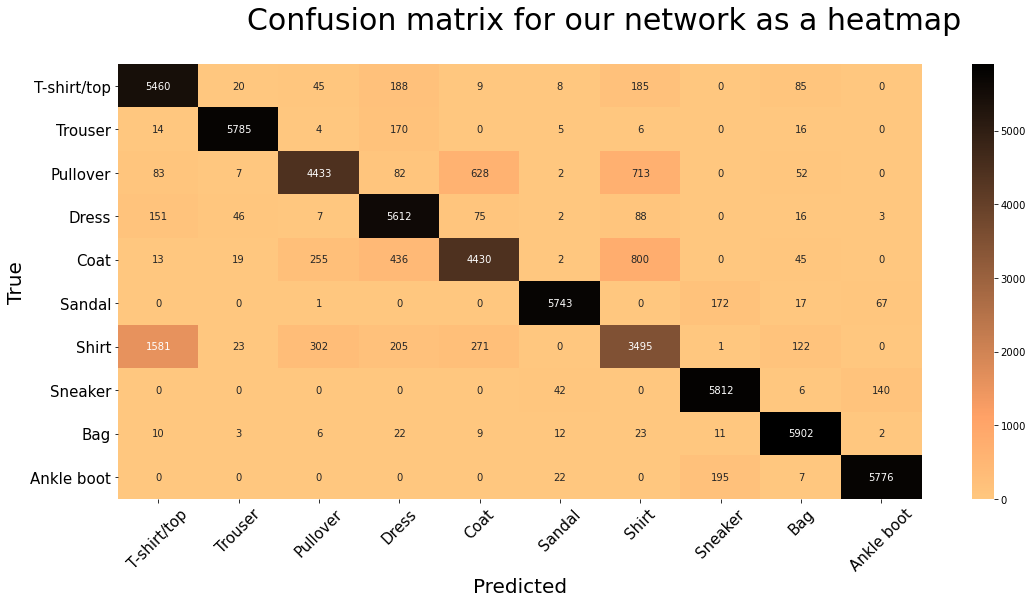

In [45]:
import seaborn as sns


names = train_set.classes

plt.figure(figsize=(18,8))
plt.suptitle("Confusion matrix for our network as a heatmap", fontsize = 30)
plt.tick_params(axis='x', labelsize=15)#Make x-scale visible
plt.tick_params(axis='y', labelsize=15)#Make y-scale visible
plt.xticks(rotation = 45) # Rotate the classes alittle bit
sns.heatmap(cmt, xticklabels = names, yticklabels = names, annot=True, fmt='d', cmap='copper_r')
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("True",  fontsize = 20)
plt.show()

# Hyperparameter Tunnning

We can manually change our parameters, but this is not an efficient way

## Run Builder Class

In [46]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product

In [47]:
class RunBuilder():
    
    @staticmethod
    def get_runs(parameters):
        Run = namedtuple('Run', parameters.keys())
        
        runs = []

        for v in product(*parameters.values()):
            runs.append(Run(*v))
        return runs

In [48]:
## this is an example of generated runs by the RunBuilder class

parameters = OrderedDict(
    batch_size  =   [100, 1000, 10000],
    rl          =  [0.00001, 0.0001, 0.001, 0.01],
    shuffle     =  [True, False]    
)

for run in RunBuilder().get_runs(parameters):
    comment = f'{run}'
    print(comment)

Run(batch_size=100, rl=1e-05, shuffle=True)
Run(batch_size=100, rl=1e-05, shuffle=False)
Run(batch_size=100, rl=0.0001, shuffle=True)
Run(batch_size=100, rl=0.0001, shuffle=False)
Run(batch_size=100, rl=0.001, shuffle=True)
Run(batch_size=100, rl=0.001, shuffle=False)
Run(batch_size=100, rl=0.01, shuffle=True)
Run(batch_size=100, rl=0.01, shuffle=False)
Run(batch_size=1000, rl=1e-05, shuffle=True)
Run(batch_size=1000, rl=1e-05, shuffle=False)
Run(batch_size=1000, rl=0.0001, shuffle=True)
Run(batch_size=1000, rl=0.0001, shuffle=False)
Run(batch_size=1000, rl=0.001, shuffle=True)
Run(batch_size=1000, rl=0.001, shuffle=False)
Run(batch_size=1000, rl=0.01, shuffle=True)
Run(batch_size=1000, rl=0.01, shuffle=False)
Run(batch_size=10000, rl=1e-05, shuffle=True)
Run(batch_size=10000, rl=1e-05, shuffle=False)
Run(batch_size=10000, rl=0.0001, shuffle=True)
Run(batch_size=10000, rl=0.0001, shuffle=False)
Run(batch_size=10000, rl=0.001, shuffle=True)
Run(batch_size=10000, rl=0.001, shuffle=False)

## Building The RunManger For Training Loop Runs
##### We can try to experiment with different parameters manually, or we can build classes that will make experimentation very easy for us

In [49]:
# from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from itertools import product
from collections import namedtuple
from collections import OrderedDict
    

In [50]:
class RunManager():
    def __init__(self):

        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None

        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None

        self.network = None
        self.loader = None
        self.tb = None
    
    
    def begin_run(self, run, network, loader):

        self.run_start_time = time.time()

        self.run_params = run
        self.run_count += 1

        self.network = network
        self.loader = loader
    #     self.tb = SummaryWriter(comment=f'-{run}')

        images, labels = next(iter(self.loader))
    #     grid = torchvision.utils.make_grid(images)

    #     self.tb.add_image('images', grid)
    #     self.tb.add_graph(
    #             self.network
    #         ,images.to(getattr(run, 'device', 'cpu'))



    def end_run(self):
    #     self.tb.close()
        self.epoch_count = 0



    def begin_epoch(self):
        self.epoch_start_time = time.time()

        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0


    def end_epoch(self):

        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

    #     self.tb.add_scalar('Loss', loss, self.epoch_count)
    #     self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

    #     for name, param in self.network.named_parameters():
    #         self.tb.add_histogram(name, param, self.epoch_count)
    #         self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results['loss'] = loss
        results["accuracy"] = accuracy
        results['epoch duration'] = epoch_duration
        results['run duration'] = run_duration
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)

        df = pd.DataFrame.from_dict(self.run_data, orient='columns')
        clear_output(wait=True)
        display(df)


    def track_loss(self, loss):
        self.epoch_loss += loss.item() * self.loader.batch_size#batch[0].shape[0]

    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self.get_num_correct(preds, labels)

    def get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()

    def save(self, fileName):

        pd.DataFrame.from_dict(
            self.run_data, orient='columns'
        ).to_csv(f'{fileName}.csv')

        with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)



### Using our classes for Hyperparametr tunning

In [51]:
parameters = OrderedDict(
    lr = [.01, 0.01, 0.001]
    ,batch_size = [1000, 2000]
    ,shuffle = [True, False],
    num_workers = [0, 1, 2, 4],
    device = ['cpu', 'cuda']
)


m = RunManager()
for run in RunBuilder.get_runs(parameters):
    
    device = torch.device(run.device)
    
    network = Network()
    network.to(device) ## Move our network to the current device
    
    loader = torch.utils.data.DataLoader(train_set, batch_size=run.batch_size, shuffle=run.shuffle, num_workers=run.num_workers)
    optimizer = optim.Adam(network.parameters(), lr=run.lr)
    
    m.begin_run(run, network,loader)
    for epoch in range(5):
        m.begin_epoch()
        for batch in loader:
            
            images, labels =  batch
            images = images.to(device)
            labels = labels.to(device)
            preds = network(images)
            loss = F.cross_entropy(preds, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            m.track_loss(loss)
            m.track_num_correct(preds, labels)
        m.end_epoch()
    m.end_run()
m.save('results')
            

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle,num_workers,device
0,1,1,0.991178,0.615567,13.573308,13.661307,0.010,1000,True,0,cpu
1,1,2,0.529693,0.797267,14.206323,27.900631,0.010,1000,True,0,cpu
2,1,3,0.435356,0.841033,13.001342,40.915957,0.010,1000,True,0,cpu
3,1,4,0.385905,0.858217,14.807413,55.737370,0.010,1000,True,0,cpu
4,1,5,0.363691,0.864817,13.884387,69.637759,0.010,1000,True,0,cpu
...,...,...,...,...,...,...,...,...,...,...,...
475,96,1,1.963664,0.348100,4.629019,6.935844,0.001,2000,False,4,cuda
476,96,2,0.943537,0.652417,4.581577,11.540421,0.001,2000,False,4,cuda
477,96,3,0.753340,0.712333,4.691170,16.253596,0.001,2000,False,4,cuda
478,96,4,0.690154,0.734650,4.669000,20.943594,0.001,2000,False,4,cuda


## Sorting the results according to epoch duration and we see cuda is winning in every case

In [52]:
pd.DataFrame.from_dict(m.run_data, orient = 'columns').sort_values('epoch duration')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle,num_workers,device
155,32,1,1.356264,0.474100,4.400014,6.695569,0.010,2000,False,4,cuda
357,72,3,0.686935,0.737933,4.400044,17.029737,0.001,1000,True,4,cuda
157,32,3,0.565797,0.783500,4.443197,15.692271,0.010,2000,False,4,cuda
395,80,1,1.518671,0.470333,4.469982,6.470994,0.001,1000,False,4,cuda
75,16,1,1.028691,0.604700,4.480002,6.386959,0.010,1000,False,4,cuda
...,...,...,...,...,...,...,...,...,...,...,...
122,25,3,0.572608,0.782833,16.679206,44.051438,0.010,2000,False,0,cpu
440,89,1,1.984919,0.358067,16.753931,17.077933,0.001,2000,False,0,cpu
14,3,5,0.333595,0.876067,16.765900,68.176238,0.010,1000,True,1,cpu
31,7,2,0.591398,0.775633,18.064981,32.676282,0.010,1000,True,4,cpu


## Sorting the results according to accuracy 

In [53]:
pd.DataFrame.from_dict(m.run_data, orient = 'columns').sort_values('accuracy')

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,shuffle,num_workers,device
470,95,1,2.087592,0.276500,9.866046,12.205042,0.001,2000,False,4,cpu
420,85,1,1.994883,0.282517,9.389997,11.050996,0.001,2000,True,2,cpu
415,84,1,2.060152,0.295967,6.433115,7.871342,0.001,2000,True,1,cuda
465,94,1,2.091826,0.302217,4.801367,6.770372,0.001,2000,False,2,cuda
425,86,1,2.075999,0.303000,4.713068,6.479569,0.001,2000,True,2,cuda
...,...,...,...,...,...,...,...,...,...,...,...
28,6,4,0.349250,0.872367,4.858604,23.904875,0.010,1000,True,2,cuda
199,40,5,0.345132,0.872417,5.135036,25.573701,0.010,1000,True,4,cuda
224,45,5,0.338386,0.874817,12.686172,54.645066,0.010,1000,False,2,cpu
14,3,5,0.333595,0.876067,16.765900,68.176238,0.010,1000,True,1,cpu
